# Written Portion

## Problem Question


In [1]:
#| echo: false
#| label: tbl-Constants
#| tbl-cap: You may assume these values for the following constants wherever necessary.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown
from tabulate import tabulate


Constants = {
    'Heat Capacity of Air':{'value':0.001,'unit':'$MJ m^{-3} K^{-1}$','Symbol':'$C_a$'},
    'Heat Capacity of Water':{'value':4.2,'unit':'$MJ m^{-3} K^{-1}$','Symbol':'$C_w$'},
    'Heat Capacity of Organic Soil':{'value':2.5,'unit':'$MJ m^{-3} K^{-1}$','Symbol':'$C_o$'},
    'Heat Capacity of Mineral Soil':{'value':2.0,'unit':'$MJ m^{-3} K^{-1}$','Symbol':'$C_a$'},
    'Solar Constant':{'value':1361,'unit':'$W m^{-2}$','Symbol':'$I_0$'},
    'Ideal Gas Constant': {'value': 8.31446261815324, 'unit': '$Pa\ m^3\ mol^{-1} K ^{-1}$','Symbol':'$R$'},
    'Molar Mass of Air': {'value': 0.028964, 'unit': '$kg mol^{-1}$','Symbol':'$M$'},
    'Dry Adiabatic Lapse Rate':{'value':0.01, 'unit': '$K m^{-1}$','Symbol':'$DALR$'}
}

Constants = pd.DataFrame(Constants).T[['Symbol','value','unit']]

Markdown(tabulate(
  Constants,headers=['Constant','Symbol','Value','Units']
))

Constant                       Symbol          Value  Units
-----------------------------  --------  -----------  ---------------------------
Heat Capacity of Air           $C_a$        0.001     $MJ m^{-3} K^{-1}$
Heat Capacity of Water         $C_w$        4.2       $MJ m^{-3} K^{-1}$
Heat Capacity of Organic Soil  $C_o$        2.5       $MJ m^{-3} K^{-1}$
Heat Capacity of Mineral Soil  $C_a$        2         $MJ m^{-3} K^{-1}$
Solar Constant                 $I_0$     1361         $W m^{-2}$
Ideal Gas Constant             $R$          8.31446   $Pa\ m^3\ mol^{-1} K ^{-1}$
Molar Mass of Air              $M$          0.028964  $kg mol^{-1}$
Dry Adiabatic Lapse Rate       $DALR$       0.01      $K m^{-1}$

In [2]:
#| echo: false
#| label: tbl-Symbols
#| tbl-cap: Definitions of selected symbols.

Symbols = {
    '$R_n$':{'name':'Net Radiation','unit':'$W m^{-2}$'},
    '$LE$':{'name':'Latent Heat Flux','unit':'$W m^{-2}$'},
    '$H$':{'name':'Sensible Heat Flux','unit':'$W m^{-2}$'},
    '$H_g$':{'name':'Ground Heat Flux','unit':'$W m^{-2}$'},
    '$Ta_z$':{'name':'Air Temperature at the Height (z in m) Above the Surface','unit':'$^{\circ}C$'},
    '$RH_z$':{'name':'Relative Humidity at the Height (z in m) Above the Surface','unit':'%'},
    '$T_0$':{'name':'Temperature at the Ground Surface','unit':'$^{\circ}C$'},
    '$Ts_z$':{'name':'Air Temperature at the Depth (z in m) Below the Surface','unit':'$^{\circ}C$'},
    '$\Theta_o$':{'name':'Volumetric Fraction of Organic Matter','unit':'%'},
    '$\Theta_w$':{'name':'Volumetric Fraction of Liquid Fresh Water','unit':'%'},
    '$P_a$':{'name':'Air Pressure','unit':'$kPa$'},
    '$rho_a$':{'name':'Density of Air','unit':'$g m^{-3}$'},
    '$rho_v$':{'name':'Partial Density of Water Vapor (aka. Absolute Humidity)','unit':'$g m^{-3}$'},
    '$L_v$':{'name':'Latent heat of vaporization','unit':'$J g^{-1}$'},
    '$Fc$':{'name':'Carbon Dioxide Flux','unit':'$\mu mol m^{-2} s^{-1}$'},
    '$\overline{u}$':{'name':'Mean Wind Speed','unit':'$m s^{-1}$'},
}

df = pd.DataFrame(Symbols).T[['name','unit']]

Markdown(tabulate(
  df,headers=['Symbol','Name','Units']
))

Symbol          Name                                                        Units
--------------  ----------------------------------------------------------  -----------------------
$R_n$           Net Radiation                                               $W m^{-2}$
$LE$            Latent Heat Flux                                            $W m^{-2}$
$H$             Sensible Heat Flux                                          $W m^{-2}$
$H_g$           Ground Heat Flux                                            $W m^{-2}$
$Ta_z$          Air Temperature at the Height (z in m) Above the Surface    $^{\circ}C$
$RH_z$          Relative Humidity at the Height (z in m) Above the Surface  %
$T_0$           Temperature at the Ground Surface                           $^{\circ}C$
$Ts_z$          Air Temperature at the Depth (z in m) Below the Surface     $^{\circ}C$
$\Theta_o$      Volumetric Fraction of Organic Matter                       %
$\Theta_w$      Volumetric Fraction of Liquid Fresh Water                   %
$P_a$           Air Pressure                                                $kPa$
$rho_a$         Density of Air                                              $g m^{-3}$
$rho_v$         Partial Density of Water Vapor (aka. Absolute Humidity)     $g m^{-3}$
$L_v$           Latent heat of vaporization                                 $J g^{-1}$
$Fc$            Carbon Dioxide Flux                                         $\mu mol m^{-2} s^{-1}$
$\overline{u}$  Mean Wind Speed                                             $m s^{-1}$

In [3]:
#| echo: false
#| label: tbl-data
#| tbl-cap: 'Data from Burns Bog. Each observation was averaged over one half hour, between 12:30-13:00 under clear sky conditions on the specified day of the year (DOY).  Sensible and latent heat fluxes were estimated using EC sensors mounted at $z = 2$ m above the ground.  You can assume that the observations were collected during an average year, where temperature and precipitation conditions were preceding the observations were typical for the season (e.g., not abnormally hot/cold and not anomalously wet/dry).'


def pmute(N,u=0,range=1,resolution = 1,i=0):
    seed=69
    np.random.seed(seed+i)
    A = (np.random.rand(N)*range)+u
    return(np.round(A,resolution))

N = 6
DALR = 0.01

Profile = pd.DataFrame({
    'DOY':list(range(150,150+N)),
    '$R_n$':pmute(N,650,50,0),
    '$LE$':pmute(N,275,30,0),
    '$H$':pmute(N,205,30,0),
    '$Ta_{2.0}$':pmute(N,25,.4),# (0.1 m above surface)
    '$Ta_{0.2}$':pmute(N,27,.5),# (0.1 m above surface)
    '$RH_{2.0}$':pmute(N,55,5),# (0.1 m above surface)
    'Fc':pmute(N,-1,.2,2),# (0.1 m above surface)
    '$\overline{u}_{2.0}$':pmute(N,.1,.05,2)
    },index=list(map(chr, range(65,65+N))))

Profile2 = pd.DataFrame({
    'DOY':list(range(235,235+N)),
    '$R_n$':pmute(N,600,50,0),
    '$LE$':pmute(N,125,30,0),
    '$H$':pmute(N,315,30,0),
    '$Ta_{2.0}$':pmute(N,20,.3),# (0.1 m above surface)
    '$Ta_{0.2}$':pmute(N,22,.4),# (0.1 m above surface)
    '$RH_{2.0}$':pmute(N,45,5),# (0.1 m above surface)
    'Fc':pmute(N,1,.2,2),# (0.1 m above surface)
    '$\overline{u}_{2.0}$':pmute(N,.3,.05,2)
    },index=list(map(chr, range(65,65+N))))

Profile = pd.concat([Profile,Profile2])

# Profile['Theta_a2'] = Profile['$Ta_{2.0}$']+2*DALR
# Profile['Theta_a0.2'] = Profile['$Ta_{0.2}$']+0.2*DALR
# Profile['DTheta_a'] = (Profile['Theta_a2']-Profile['Theta_a0.2'])/1.8
# Profile['K_H'] = Profile['$H$']/(-0.001*1e6*Profile['DTheta_a'])

# Profile['G'] = Profile['$R_n$']-(Profile['$LE$']+Profile['$H$'])

Markdown(tabulate(
  Profile.values,headers=Profile.columns.values
))

  DOY    $R_n$    $LE$    $H$    $Ta_{2.0}$    $Ta_{0.2}$    $RH_{2.0}$     Fc    $\overline{u}_{2.0}$
-----  -------  ------  -----  ------------  ------------  ------------  -----  ----------------------
  150      665     284    214          25.1          27.1          56.5  -0.94                    0.11
  151      690     299    229          25.3          27.4          59    -0.84                    0.14
  152      668     286    216          25.1          27.2          56.8  -0.93                    0.12
  153      689     299    229          25.3          27.4          58.9  -0.84                    0.14
  154      678     292    222          25.2          27.3          57.8  -0.89                    0.13
  155      663     283    213          25.1          27.1          56.3  -0.95                    0.11
  235      615     134    324          20.1          22.1          46.5   1.06                    0.31
  236      640     149    339          20.2          22.3          49     1.16                    0.34
  237      618     136    326          20.1          22.1          46.8   1.07                    0.32
  238      639     149    339          20.2          22.3          48.9   1.16                    0.34
  239      628     142    332          20.2          22.2          47.8   1.11                    0.33
  240      613     133    323          20.1          22.1          46.3   1.05                    0.31

You have randomly been assigned observations of conditions from Burns Bog, on two separate days which listed in @tbl-data.  

(@) Given the conditions for both of your assigned observations, do you expect the stable, neutral, or unstable atmospheric conditions? Why?  

(@) Calculate the eddy diffusivity of sensible heat flux for both of your assigned observations.

(@) Calculate $\overline{w^{\prime}\rho_v^{\prime}}$ for both of your assigned observations.

(@) Calculate the total mass of $CO_2$ uptake/emission (in $\rm{mg \ m}^{-2}$) over both of your assigned observations.  Was the site was a source or sink for atmospheric $CO_2$ during each period?  Speculate on which component of the carbon balance (Ecosystem Respiration or Gross Primary Productivity) was greater for each period.

(@) Estimate the magnitude of ground heat flux ($H_g$) for both of your assigned observations.  You can assume that any storage terms not listed in the table are negligible.

(@) Calculate the Bowen Ratio ($\beta$) for both of your assigned observations.  Discuss what the difference in $\beta$ between your two days means, and speculate on the underlying reason for the difference between the two observations.  For context, you can refer to the image below, which shows a 30-year climate normals for a near-by site.


Text(0.5, 1.0, 'Average Monthly Precipitation at Vancouver International Airport')

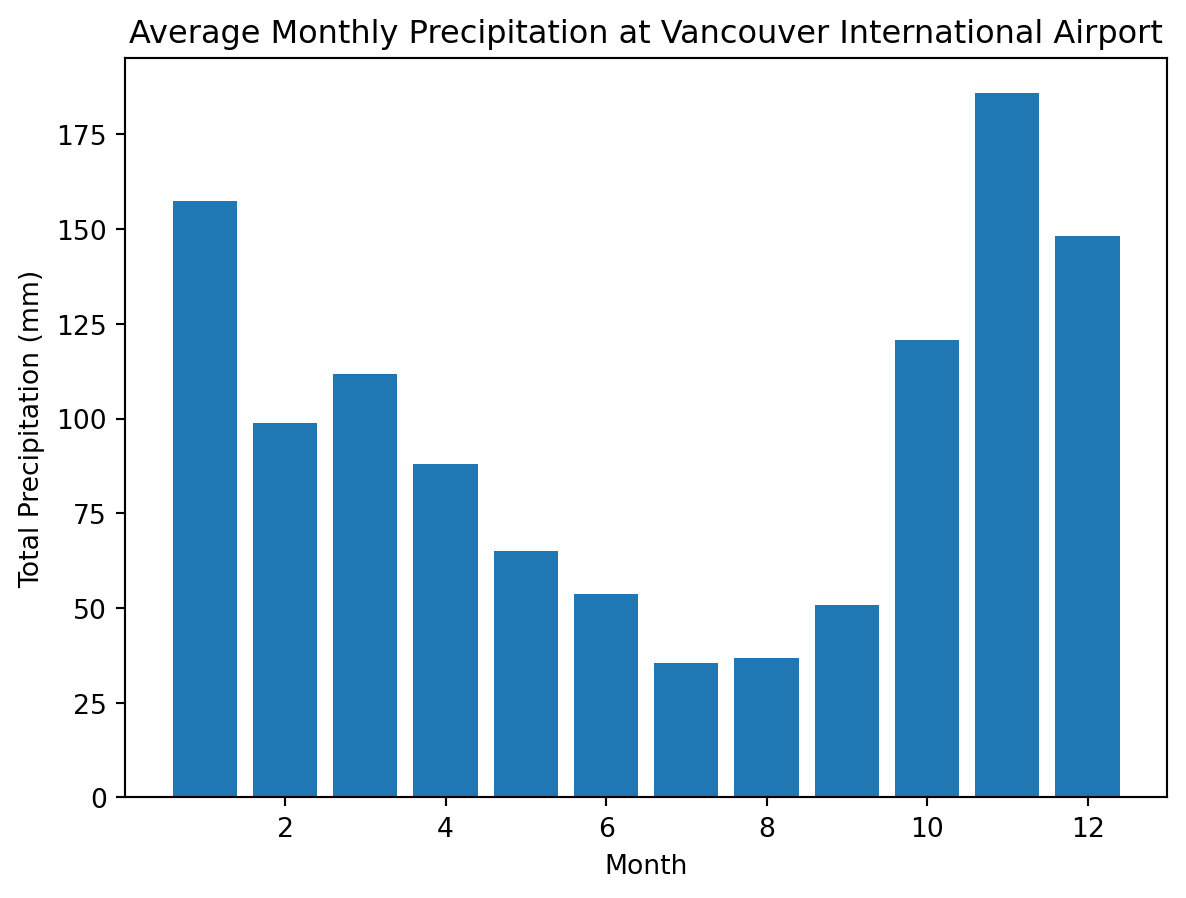

In [4]:
#| echo: false
#| label: fig-data
#| fig-cap: 'Climate information from the Vancouver International Airport, which is approximately 15km north-west of Burns Bog.'

Rainfall=[157.5,	98.9,	111.8,	88.1,	65,	53.8,	35.6,	36.7,	50.9,	120.7,	185.8,	148.3]
Month = list(range(1,13))
plt.figure()
plt.bar(Month,Rainfall)
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.title('Average Monthly Precipitation at Vancouver International Airport')

## Short Answers


(@) Briefly explain the concept of Reynolds decomposition?  Then use it to calculate the $\overline{u^{\prime}w^{\prime}}$ and $u_*$ for the following data set


In [5]:
#| echo: false
#| label: tbl-data2
#| tbl-cap: Sample of .


u = np.array([1.0,0.0,1.0,2.0,1.0,0.0,0.50,1.25])
w = np.array([0.0,0.1,0.0,-.1,0.0,0.0,-.25,0.25])

df = pd.DataFrame(data={'$u_a$':u,'$w_a$':w})

df['$u_b$'] = df['$u_a$']*2
df['$w_b$'] = df['$w_a$']*2

df['$u_c$'] = df['$u_a$']*3
df['$w_c$'] = df['$w_a$']*3

df['$u_d$'] = df['$u_a$']*4
df['$w_d$'] = df['$w_a$']*4

# u_prime = u-u.mean()
# w_prime = w-w.mean()
# print((u_prime*w_prime).mean())
# print((-(u_prime*w_prime).mean())**.5)


Markdown(tabulate(
  df.values,headers=df.columns.values
))



# u = np.array([1.0,0.0,1.0,2.0,1.0,0.0,0.50,1.25])*2
# w = np.array([0.0,0.1,0.0,-.1,0.0,0.0,-.25,0.25])

# df = pd.DataFrame(data={'$u_a$':u_a,'$w_a$':w_a,'$u_b$':u_b,'$w_b$':w_b,'$u_c$':u_c,'$w_c$':w_c})

# u_prime = u-u.mean()
# w_prime = w-w.mean()
# print((u_prime*w_prime).mean())
# print((-(u_prime*w_prime).mean())**.5)


# Markdown(tabulate(
#   df.values,headers=df.columns.values
# ))

  $u_a$    $w_a$    $u_b$    $w_b$    $u_c$    $w_c$    $u_d$    $w_d$
-------  -------  -------  -------  -------  -------  -------  -------
   1        0         2        0       3        0           4      0
   0        0.1       0        0.2     0        0.3         0      0.4
   1        0         2        0       3        0           4      0
   2       -0.1       4       -0.2     6       -0.3         8     -0.4
   1        0         2        0       3        0           4      0
   0        0         0        0       0        0           0      0
   0.5     -0.25      1       -0.5     1.5     -0.75        2     -1
   1.25     0.25      2.5      0.5     3.75     0.75        5      1

(@) Briefly explain what factors influence evapotranspiration from a vegetated surface?

(@) Briefly explain what factors influence net all-wave radiation ($R_n$) at the earth's surface?

<!-- * [This slide](../Lectures/07.html#/component-fluxes) summarizes the important aspects:
* $SW^*$ depends on:
  + $SW\downarrow$ > influenced by sun earth geometry (distance from sun, solar declination); beam spreading (latitude, time of day, and slope, should mention of cosine law of attenuation for full credit), along with atmospheric scattering & reflection (bulk transitivity).  **Only** sourced from the Sun (**1/4**)
  + $SW\uparrow$ > determined by albedo & magnitude of $SW\downarrow$.  Albedo is determined by surface properties (e.g., presence of snow, vegetation health, soil type/moisture, etc.) and varies by sun angle (albedo is higher for lower sun angles).  For some "surfaces" (ice, water, etc.) it also depends on the transitivity of the volume.  Surface can absorb $SW\downarrow$, but **cannot** emit it! (**1/4**)
* $LW^*$ depends on:
  + $LW\downarrow$ > determined by the temperature and emissivity $\epsilon$ of the atmosphere.  Warmer atmosphere = higher LW emissions; more emissive atmosphere = higher LW emissions.  Clouds are a good example: $LW\downarrow$ tends to be higher (for equivalent surface temps/seasons) when clouds are present (**1/4**)
  + $LW\uparrow$ > determined by the temperature, emissivity $\epsilon$, and **reflectivity** of the surface.  Warmer surface = higher LW emissions; more emissive surface = higher LW emissions.  Should mention that $\epsilon = \zeta$ (absorptivity) in the **long-wave** portion of the spectrum (Khirchoff's law).  Also influenced by surface albedo ($SW$): Lower albedo = higher SW absorption = warmer surface = higher LW emissions.(**1/4**) -->

# Fill in the blanks

(@) Negative sensible heat flux is more likely to occur during the _____ than during the _____.

(@) Positive _____ heat flux indicates that _____ is occurring at the surface.

(@) A(n) _____ process is on where temperature changes due to compression/expansion of a gas, ____ the exchange of energy with the surrounding environment.

(@) For any given soil, it's _____ increases linearly as a function of volumetric _____ content.

# Multiple Choice

(@) A temperature inversion in the atmosphere near the Earth's surface would result in

* Negative (downward) sensible heat flux
* Positive (downward) sensible heat flux
* Positive (upward) sensible heat flux
* Suppression of turbulence
* Production of turbulence

(@) This is the time of year when the earth is closest to the sun

* Perihelion
* Aphelion
* Summer Solstice
* Winter Solstice
* Every day, Earth is always the same distance from the sun

(@) Obukhov length ($L$) is a measure of atmospheric:

* Humidity
* Stability
* Temperature
* Kinetic Energy
* Energy Density

(@) Which surface would you expect to have the greatest aerodynamic roughness length ($z_0$)

* Ice
* Water
* Bare Soil
* Grassland
* Forest

(@) Which of the following locations would you expect to have the highest average latent heat flux over an entire year?

* At the Equator in the Pacific Ocean
* Sahara Desert
* An irrigated cotton farm in California
* Lake Superior
* A temperate rain forest in British Columbia

(@) This type of flow most common on calm, clear nights with weak winds

* Laminar
* Adiabatic
* Turbulent
* Kinetic
* Stable

(@) Mechanical turbulence increases with increasing:

* Mean wind speeds
* Height above the surface
* Latent heat flux
* Surface roughness
* Ground heat flux

# True/False

(@) Positive ground heat flux ($H_g$) indicates that heat energy is moving from the soil into the atmosphere.

(@) Days with strong winds and high sensible heat flux are the optimal conditions for producing wind power.

* True
* False

(@) Typically, on a hot and sunny day in mid-summer, we expect $\overline{w}>0 \ \rm{m s}^{-1}$

* True
* False

(@) $NPP \approx -NEE$, therefore NEE and NPP are synonymous.

* True
* False

(@) Soil temperatures tend to become more variable with increasing depth.

* True
* False

(@) Select true for 5 free points:

* True
* False

# Calculations


In [6]:
import numpy as np
import pandas as pd
seed = 69
N = 3
np.random.seed(seed)

SW_in = np.round(np.random.rand(N)*375)
Albedo = np.round(np.random.rand(N)*.9,3)
# SW_out = np.round(np.random.rand(N)*125,3)

epsilon = np.round(np.random.rand(N)*.065+.9,3)
np.random.seed(seed)
LW_in = np.round(np.random.rand(N)*20+100)

(@) Given $SW_\downarrow$ of `{python} SW_in` and $LW\downarrow$ is `{python} LW_in` $W m^{-2}$, with a surface albedo $\alpha$ of `{python} Albedo` and a surface emissivity ($\epsilon_{o,LW}$) of `{python} epsilon`, estimate net radiation $R_n$?


In [7]:
a=epsilon
alpha = 1-a 
print('alpha = ', alpha)
LW_out = LW_in*alpha
SW_out = SW_in*alpha
R_n = SW_in-SW_out+LW_in-LW_out
print(R_n)

alpha =  [0.093 0.096 0.056]
[196.819 378.776 224.672]


In [8]:
import numpy as np
k = 0.41
R = 40 # m
E = 0.35 # %
z = 100 # m
z0 = 0.25 # m
u_star = 0.75 # m/s
rho = 1.22 # kg m-3

u_bar = u_star/k*np.log(z/z0)

U = np.pi/2*rho*E*(R**2)*(u_bar**3)

print(f'{U*1e-3:.1f} kW')

1412.9 kW


(@) Estimate the power generation (in kilowatts) of a wind turbine with R = `{python} R` m, z = `{python} z` m and E = `{python} E`% under the following conditions: Neutral stability, $u_∗$ = `{python} u_star` m/s, z0 = `{python} z0` m, $\rho$ = `{python} rho` $\rm{kg m^{-3}}$.


In [9]:
import numpy as np
k = 0.41
R = 25 # m
E = 0.35 # %
z = 60 # m
z0 = 0.2 # m
u_star = 0.85 # m/s
rho = 1.22 # kg m-3

u_bar = u_star/k*np.log(z/z0)

U = np.pi/2*rho*E*(R**2)*(u_bar**3)

print(f'{U*1e-3:.1f} kW')

693.1 kW


(@) Estimate the power generation (in kilowatts) of a wind turbine with R = `{python} R` m, z = `{python} z` m and E = `{python} E`% under the following conditions: Neutral stability, $u_∗$ = `{python} u_star` m/s, z0 = `{python} z0` m, $\rho$ = `{python} rho` $\rm{kg m^{-3}}$.